In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load the data and show basic data

In [3]:
df = pd.read_csv("../data/diabetes.csv")
df.shape
df.head()
df.info()
df.describe().round(3)

discrete_cols: list[str] = [
    "Gender",
    "smoking",
    "drinking",
    "family_histroy",
    "Diabetes",
]
continuous_cols: list[str] = [col for col in df.columns if col not in discrete_cols]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

### 1. Dataset Overview
The dataset contains a collection of medical and lifestyle variables related to diabetes risk.  
Each record represents a single patient, described by demographic, clinical, and behavioral features.  
The primary goal is to analyze which factors are most associated with the presence of diabetes (`Diabetes`).

#### Features of the Dataset

| Feature | Description |
|----------|--------------|
| **Age** | Patient's age in years. Higher age is often associated with an increased risk of type 2 diabetes. |
| **Gender** | Biological sex of the patient (0: Female, 1: Male). May influence metabolic and hormonal risk factors. |
| **BMI (Body Mass Index)** | Indicator of body fat based on weight and height. High BMI often correlates with insulin resistance. |
| **SBP (Systolic Blood Pressure)** | The top blood pressure reading (when the heart contracts). High SBP is linked to metabolic syndrome and diabetes. |
| **DBP (Diastolic Blood Pressure)** | The bottom blood pressure reading (when the heart relaxes). Elevated DBP may indicate cardiovascular stress. |
| **FPG (Fasting Plasma Glucose)** | Blood sugar level after fasting. One of the main diagnostic indicators of diabetes. |
| **FFPG (Final Fasting Plasma Glucose)** | Follow-up fasting glucose measurement — helps confirm or monitor glucose control. |
| **Cholesterol (Chol)** | Total cholesterol concentration. Abnormal lipid profiles often accompany diabetes. |
| **Triglyceride (Tri)** | Blood fat level — elevated triglycerides are a common metabolic abnormality in diabetics. |
| **HDL (High-Density Lipoprotein)** | "Good cholesterol." Low HDL levels are associated with higher diabetes and heart disease risk. |
| **LDL (Low-Density Lipoprotein)** | "Bad cholesterol." High LDL can contribute to vascular complications. |
| **ALT (Alanine Aminotransferase)** | Liver enzyme — elevated levels may indicate fatty liver, often related to diabetes. |
| **BUN (Blood Urea Nitrogen)** | Kidney function indicator. Changes in BUN may reflect renal complications of diabetes. |
| **CCR (Creatinine Clearance Rate)** | Another marker of kidney health; low CCR suggests impaired filtration. |
| **Smoking Status** | (1: Current Smoker, 2: Former Smoker, 3: Never Smoker). Smoking is a known risk factor for insulin resistance. |
| **Drinking Status** | (1: Current Drinker, 2: Former Drinker, 3: Never Drinker). Alcohol consumption patterns may affect glucose metabolism. |
| **Family History of Diabetes** | (1: Yes, 0: No). Indicates genetic predisposition to diabetes. |
| **Diabetes** | (1: Presence of diabetes, 0: No diabetes) — the target variable. |

---

### Check missing values

In [87]:
df.isnull().sum()

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

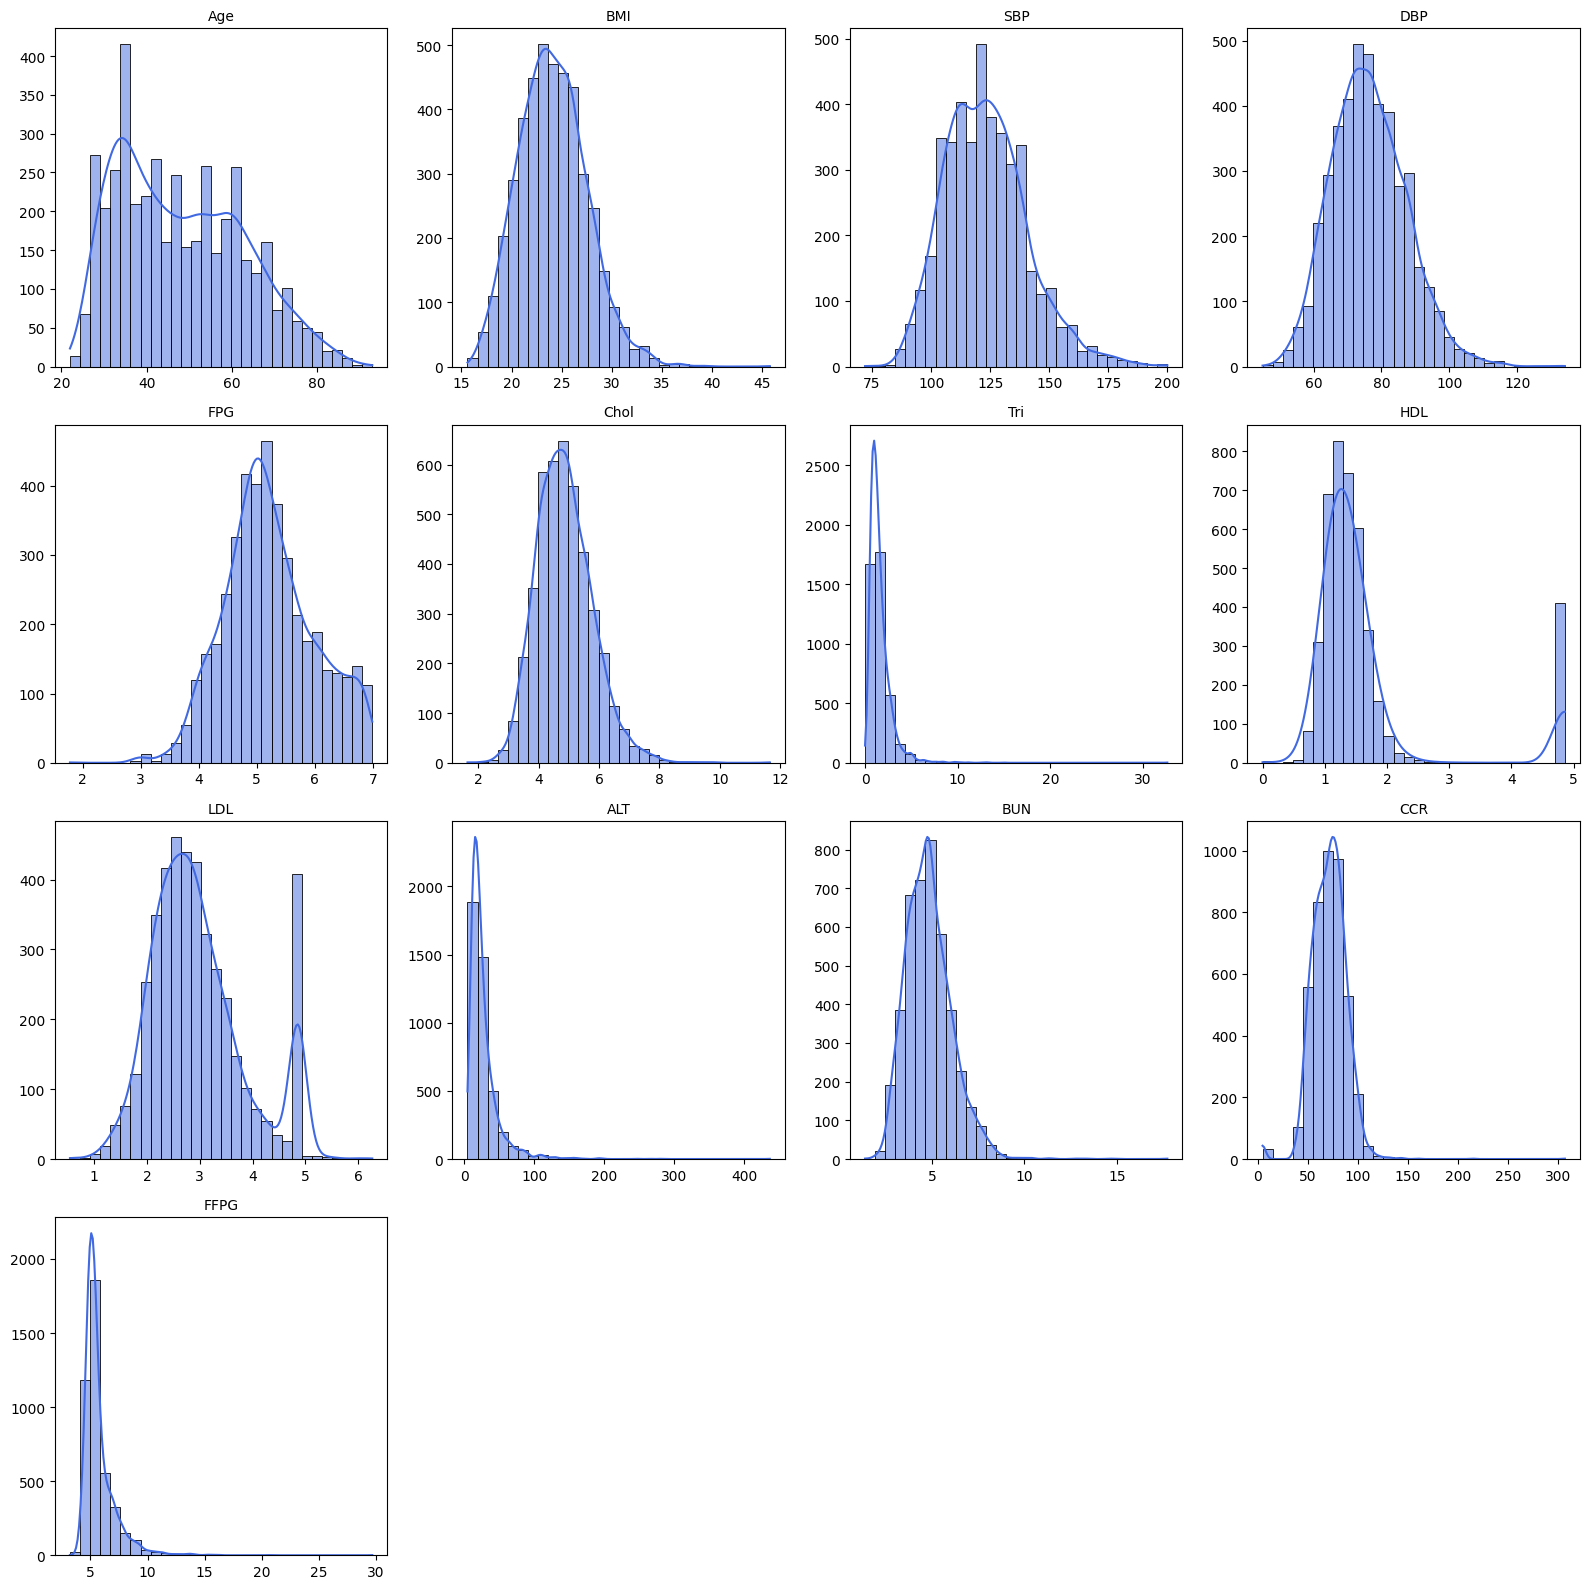

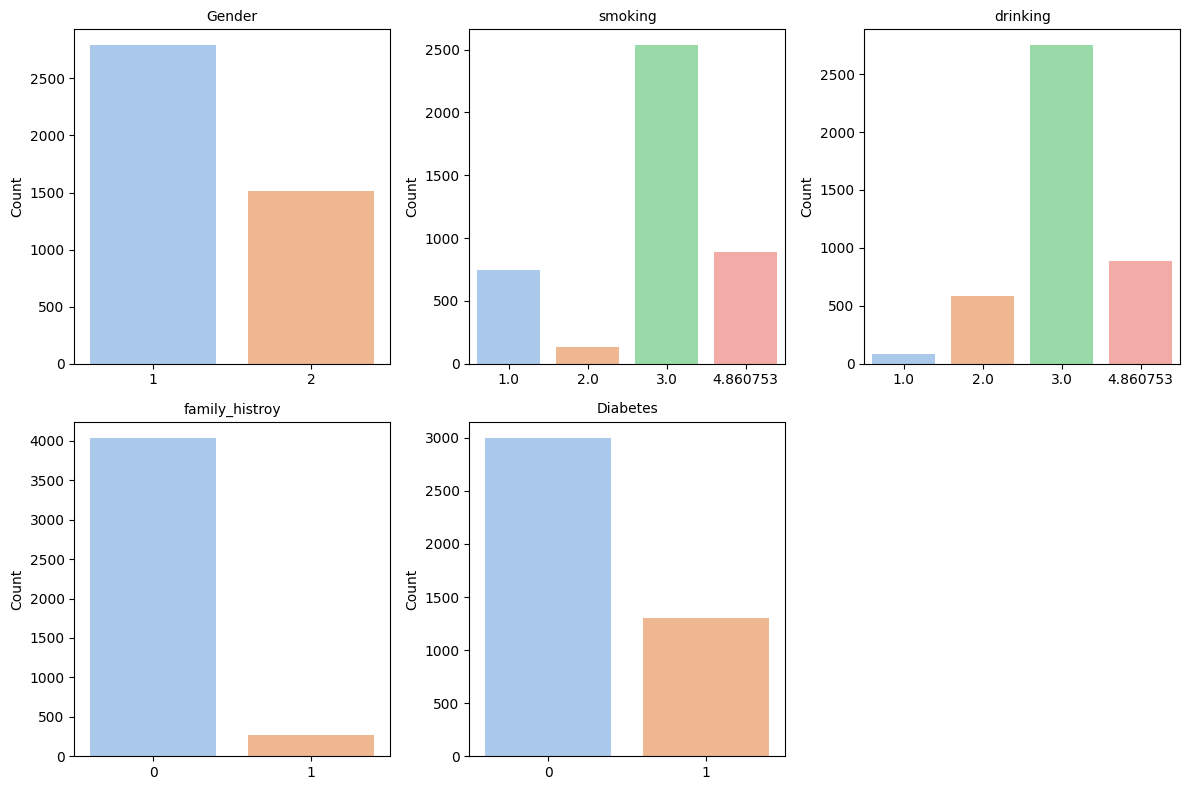

In [88]:
n_cols = 4
n_rows = math.ceil(len(continuous_cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="royalblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

n_cols = 3
n_rows = math.ceil(len(discrete_cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(discrete_cols):
    sns.countplot(data=df, x=col, hue=col, palette="pastel", ax=axes[i], legend=False)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Smoking Status: (1: Current Smoker, 2: Ever Smoker, 3: Never Smoker)

Drinking Status: (1: Current Drinker, 2: Ever Drinker, 3: Never Drinker)

Family History of Diabetes: (1: Yes, 0: No)

The float data of value `4.860753` must be incorrect as it is not mentioned in the dataset description. Proper handling of the data will be required to proceed.

Diabetes          1.000000
drinking          0.706582
FFPG              0.583107
smoking           0.569857
Age               0.521380
FPG               0.515342
HDL               0.453618
LDL               0.386235
SBP               0.282476
BMI               0.236583
DBP               0.169963
Tri               0.169151
BUN               0.148571
Chol              0.124310
ALT               0.060568
family_histroy    0.028939
Gender            0.007251
CCR              -0.067295
Name: Diabetes, dtype: float64


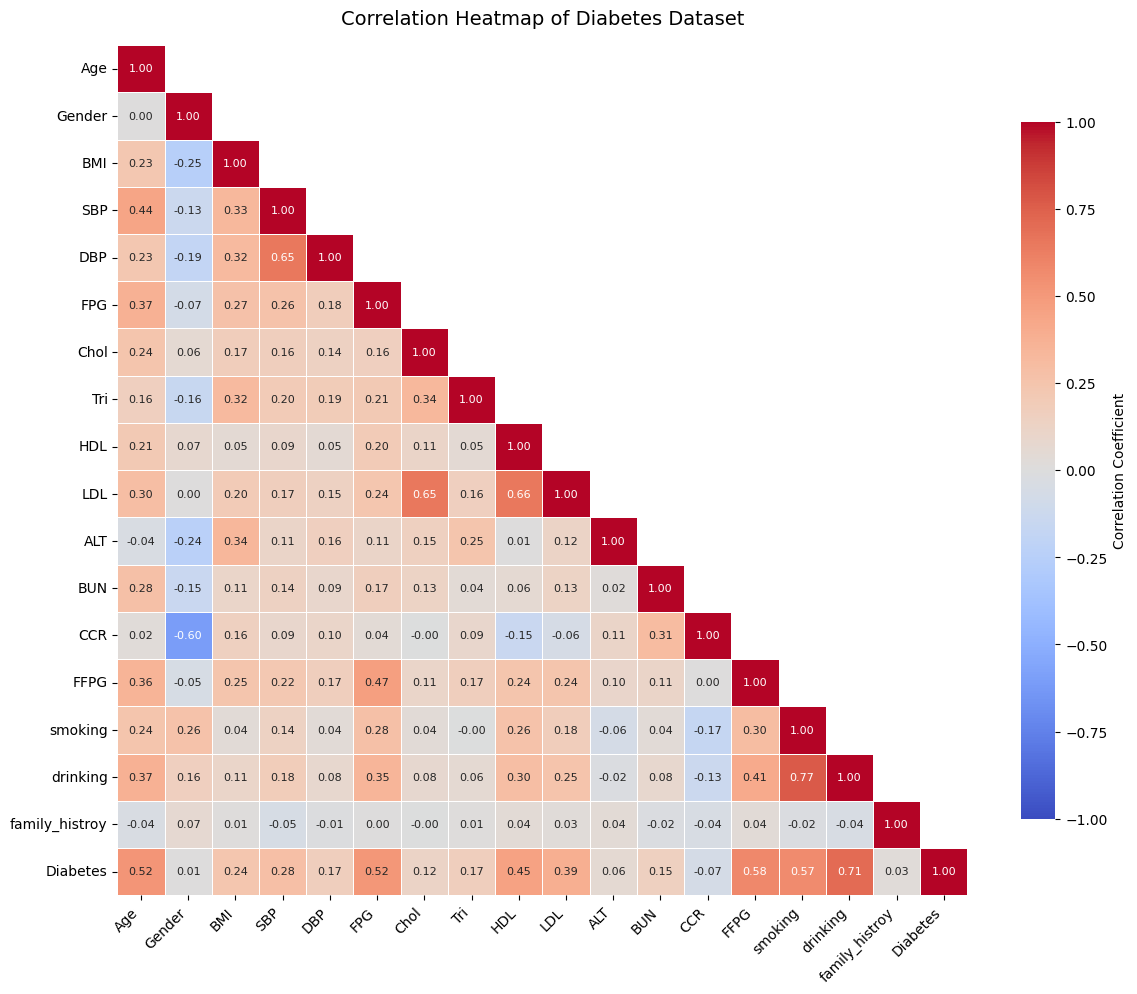

In [89]:
corr_with_target = df.corr(numeric_only=True)["Diabetes"].sort_values(ascending=False)

print(corr_with_target)
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot_kws={"size": 8},
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
)

plt.title("Correlation Heatmap of Diabetes Dataset", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Outlier Detection

Outliers were identified using the **Interquartile Range (IQR)** method.  
For each numerical feature, the first (Q1) and third (Q3) quartiles were calculated, and the interquartile range was defined as:

```
IQR = Q3 - Q1
```

Values falling outside the range:  
**[Q1 - 1.5 × IQR, Q3 + 1.5 × IQR]**  
were considered potential outliers.

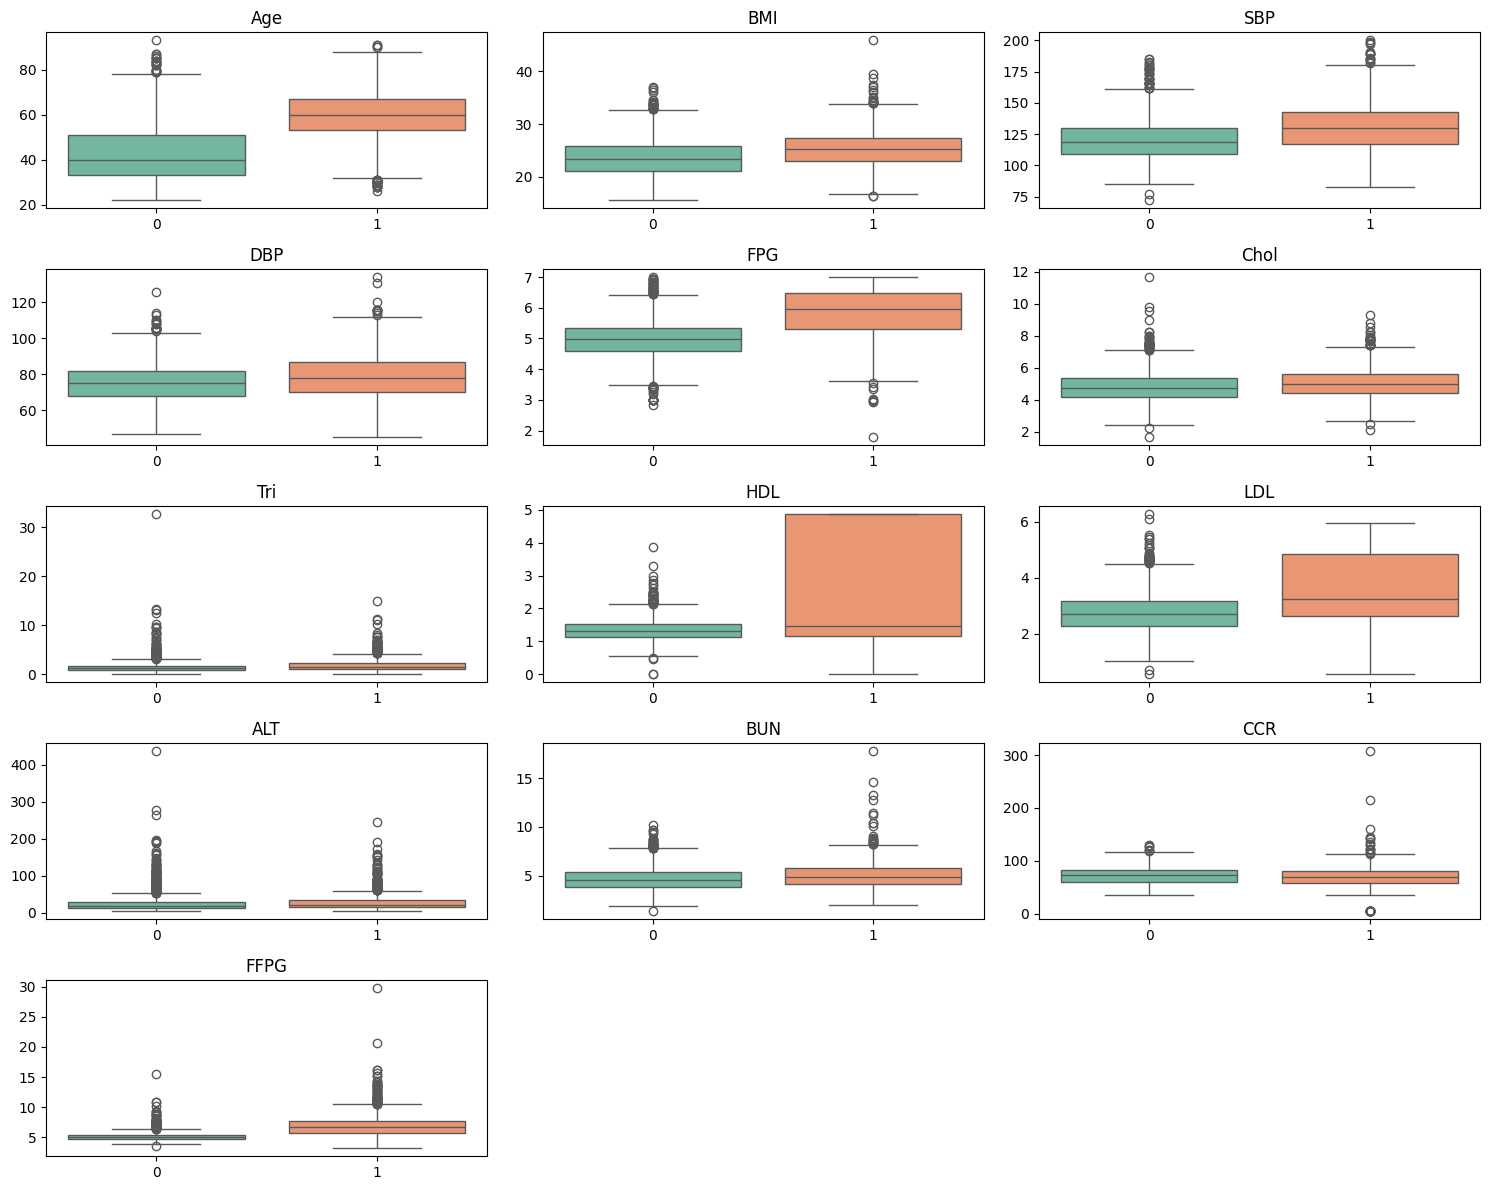

In [90]:
fig, axes = plt.subplots(nrows=len(continuous_cols) // 3 + 1, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(
        x="Diabetes",
        y=col,
        hue="Diabetes",
        data=df,
        ax=axes[i],
        palette="Set2",
        legend=False,
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [91]:
numeric_df = df[continuous_cols]
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Age       0
BMI      41
SBP      76
DBP      53
FPG      17
Chol     63
Tri     215
HDL     436
LDL      19
ALT     300
BUN      61
CCR      56
FFPG    349
dtype: int64


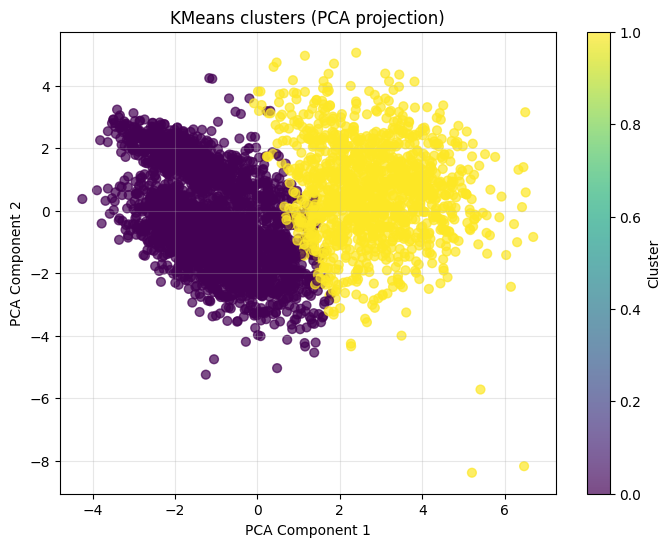

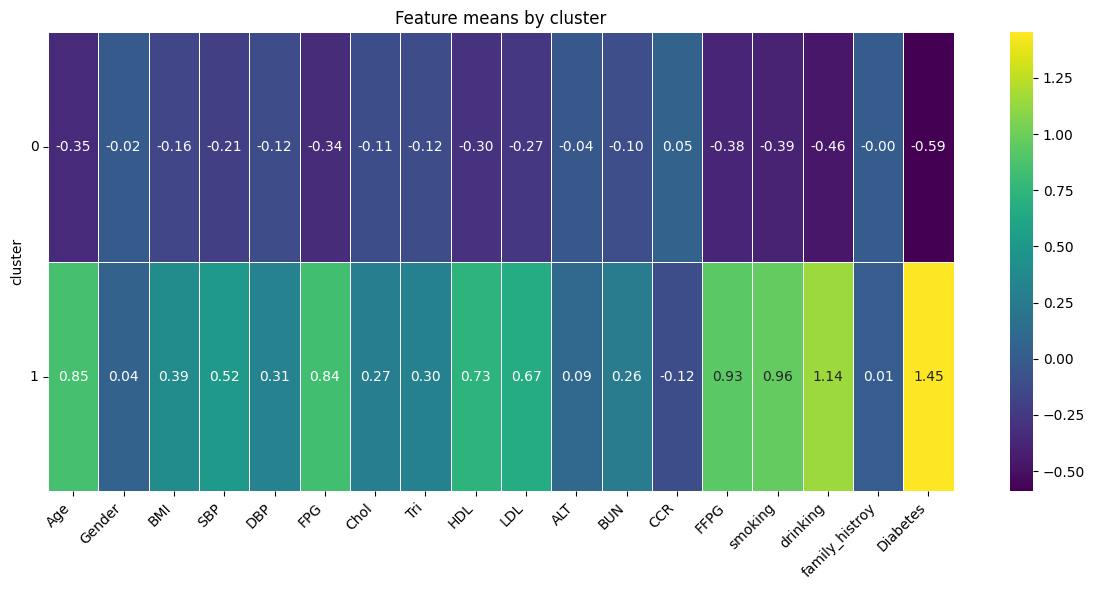

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
df_no_target = df.copy()  # df.drop(columns=["Diabetes"])
X_scaled = scaler.fit_transform(df_no_target)
model = KMeans(
    n_clusters=2,
    random_state=42,
    n_init="auto",
)
labels: np.ndarray = model.fit_predict(X_scaled)
pca = PCA(n_components=2, random_state=42)
pca_coords: np.ndarray = pca.fit_transform(X_scaled)
if pca_coords.shape[1] != 2:
    raise ValueError("PCA coordinates must be 2-dimensional for plotting.")

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_coords[:, 0],
    pca_coords[:, 1],
    c=labels,
    cmap="viridis",
    alpha=0.7,
    s=40,
)

plt.title("KMeans clusters (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(alpha=0.3)

plt.show()

df_scaled_plot = pd.DataFrame(X_scaled, columns=df_no_target.columns)
df_scaled_plot["cluster"] = labels
cluster_stats: pd.DataFrame = df_scaled_plot.groupby("cluster").mean()

plt.figure(figsize=(12, 6))

sns.heatmap(cluster_stats, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5, linecolor="white")

plt.title("Feature means by cluster")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


def get_association_rules(
    df: pd.DataFrame, min_support: float = 0.05, min_confidence: float = 0.3
) -> pd.DataFrame:
    """
    Generates association rules for Diabetes prediction.
    """
    df_rules = df.copy()

    # BMI Categories (World Health Organization standards)
    df_rules["BMI_Cat"] = pd.cut(
        df_rules["BMI"],
        bins=[0, 18.5, 25, 30, 100],
        labels=["Underweight", "Normal", "Overweight", "Obese"],
    )

    # Age Categories
    df_rules["Age_Cat"] = pd.cut(
        df_rules["Age"], bins=[0, 35, 55, 100], labels=["Young", "Middle-Aged", "Senior"]
    )

    df_rules["FPG_Cat"] = pd.cut(
        df_rules["FPG"],
        bins=[0, 5.5, 7.0, 100],
        labels=["Normal_Glucose", "Prediabetes", "High_Glucose"],
    )

    df_rules["BP_Cat"] = pd.cut(
        df_rules["SBP"],
        bins=[0, 120, 140, 300],
        labels=["Optimal_BP", "Elevated_BP", "Hypertension"],
    )

    cols_to_analyze = [
        "BMI_Cat",
        "Age_Cat",
        "FPG_Cat",
        "BP_Cat",
        "family_history",
        "smoking",
        "Diabetes",
    ]

    cols_to_analyze = [c for c in cols_to_analyze if c in df_rules.columns]
    data_for_mining = df_rules[cols_to_analyze].astype(str)
    df_ohe = pd.get_dummies(data_for_mining)

    # APRIORI ALGORITHM
    # Find frequent itemsets (combinations of features)
    frequent_itemsets = apriori(df_ohe, min_support=min_support, use_colnames=True)

    if frequent_itemsets.empty:
        print("No frequent itemsets found. Try lowering min_support.")
        return pd.DataFrame()

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    target_col = "Diabetes_1"

    diabetes_rules = rules[rules["consequents"].apply(lambda x: target_col in x)]

    return diabetes_rules.sort_values(by="lift", ascending=False)


df_clean_rules = df[~df["smoking"].astype(str).str.contains("4.86")]
df_clean_rules = df_clean_rules[~df_clean_rules["drinking"].astype(str).str.contains("4.86")]
rules_df = get_association_rules(df_clean_rules)
print(rules_df[["antecedents", "consequents", "support", "confidence", "lift"]].head(10))

                               antecedents   consequents   support  \
352  (FPG_Cat_Prediabetes, Age_Cat_Senior)  (Diabetes_1)  0.052709   
78                   (FPG_Cat_Prediabetes)  (Diabetes_1)  0.079941   
54                        (Age_Cat_Senior)  (Diabetes_1)  0.079063   
370          (Age_Cat_Senior, smoking_3.0)  (Diabetes_1)  0.053001   

     confidence      lift  
352    0.545455  4.488499  
78     0.359211  2.955913  
54     0.333745  2.746362  
370    0.329690  2.712994  


Used columns (17): ['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking', 'family_histroy']
Variance: 33.96%


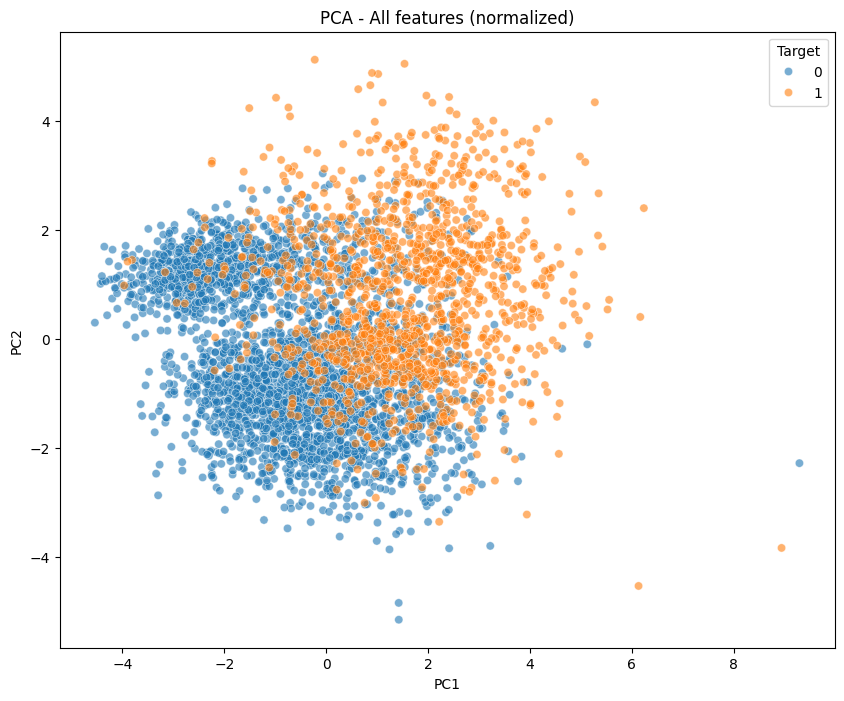

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_eda = df.copy()

cols_123 = ["smoking", "drinking"]
for col in cols_123:
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].clip(lower=1, upper=3)

target_col = "Diabetes"
features = df_eda.select_dtypes(include=["number"]).columns.tolist()
if target_col in features:
    features.remove(target_col)

df_eda = df_eda.dropna(subset=features + [target_col])

x = df_eda[features].values
y = df_eda[target_col].values

x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(data=principalComponents, columns=["PC1", "PC2"])
pca_df["Target"] = y

print(f"Used columns ({len(features)}): {features}")
print(f"Variance: {sum(pca.explained_variance_ratio_):.2%}")

plt.figure(figsize=(10, 8))
sns.scatterplot(x="PC1", y="PC2", hue="Target", data=pca_df, alpha=0.6)
plt.title("PCA - All features (normalized)")
plt.show()

### Exploratory Data Analysis Summary

#### 1. Missing Data

No missing values were detected in the dataset.

#### 2. Outliers

A significant number of outliers were identified in several variables, including HDL, ALT, FFPG, and Tri.
However, in medial data these outliers might have occurred and might not prove dysfunctional, additional analysis should be performed.

#### 3. Correlation with Diabetes

The strongest positive correlations with diabetes occurrence were observed for the variables:  
**drinking, smoking, FFPG, FPG, Age, and HDL**.  
Most of the remaining variables show weaker relationships.

#### 4. Data Quality Issues

Some categorical variables contain invalid values:
- `smoking` and `drinking` have values outside the 1–3 range (`4.860753`). An error, or null data handling, must have been made while preprocessing the data before putting it into Kaggle.
These issues may affect the analysis and should be corrected before modeling.

### 5. Feature Scaling and Normalization
Since many features have different units and numerical scales (e.g., glucose levels in mg/dL, BMI in kg/m², blood pressure in mmHg),  
it is essential to normalize or standardize the data before model training.  

- **Normalization (Min–Max Scaling)**: Recommended for algorithms sensitive to scale such as *Logistic Regression*.  
  Transforms all features into the range [0, 1].

- **Standardization (Z-Score Scaling)**: Centers features around zero mean and unit variance.  
  Works well for models assuming normally distributed input (e.g., *SVM, KNN*).

### 6. Summary
The dataset is clean in terms of missing data but some operations might be required before building a classification model:
- Normalization or standardization
- correction of categorical encoding (`smoking`, `drinking`),
- handling of extreme outliers,
- selection of top features for predictive modeling.